In [2]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# grhpviz
from sklearn.tree import export_graphviz

import graphviz


# 기계 학습 모델 필요 모듈
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 구성

In [3]:
df_raw = pd.read_csv("Data/diagnosis.csv", encoding="cp949")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [4]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [5]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 더미변수 생성

In [7]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis=1, inplace = False)

In [8]:
df_raw_dummy = pd.get_dummies(df_raw_x)
df_raw_dummy.head()
df_raw_dummy.shape

(320, 30)

### 데이터 분할

In [9]:
# train_test_split (7:3으로 트레인과 테스트 데이터가 나눠진다.)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, df_raw_y, 
                                                                test_size=0.4, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (192, 30)
train data Y size: (192,)
test data X size: (128, 30)
test data Y size: (128,)


# 2. 모델 생성

In [10]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

#test데이터 정확
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.901
Accuracy on test set: 0.930


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 트레이닝 데이터보다 테스트 데이터의 정학도가 더 높은 모습을 보여준다. 뭔가 이상한 문제가 있다고 생각한다.
- 데이터를 스케일링한 후 확인해봐야겠다.

### 스케일링

In [11]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_dummy)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [15]:
### 스케일링 데이터 분할
df_scaled_train_x, df_scaled_test_x= train_test_split(df_scaled, test_size=0.4,
                                                      random_state=1234)

print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))


train data X size: (192, 30)
test data X size: (128, 30)


### 스케일링 데이터로 모델 생성

In [16]:
mlp_scaled = MLPClassifier(random_state=1234)
mlp_scaled.fit(df_scaled_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(mlp_scaled.score(df_scaled_train_x, df_train_y)))

#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(mlp_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 데이터를 스케일링한 것만으로 성능이 매우 좋아졌음을 확인할 수 있다.
- 그러나 트레이닝 셋에 어느정도 과적합이 존재하는 것으로 보여 하이퍼 파라미터 변경을 해보겠다.

## 하이퍼 파라미터 변경

### HiddenLayer: 은닉층 변경
- NN모델은 트레이닝에 꽤나오랜 시간이 걸린다.

In [17]:
train_accuracy=[]; test_accuracy = []

para_hidden = [20*hidden for hidden in range(1, 11)] 

for v_hidden in para_hidden:
    nn = MLPClassifier(random_state=1234, hidden_layer_sizes = (v_hidden, v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["Hidden_layer"] = para_hidden

df_accuracy_hidden["TrainScore"] = train_accuracy
df_accuracy_hidden["TestScore"] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


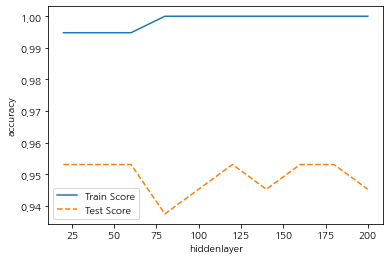

In [18]:
plt.plot(para_hidden, train_accuracy, linestyle="-", label = "Train Score")
plt.plot(para_hidden, test_accuracy, linestyle="--", label = "Test Score")
plt.xlabel("hiddenlayer")
plt.ylabel("accuracy")
plt.legend()

In [19]:
df_accuracy_hidden.round(3)

,Hidden_layer,TrainScore,TestScore
0,20,0.995,0.953
1,40,0.995,0.953
2,60,0.995,0.953
3,80,1.000,0.938
4,100,1.000,0.945
5,120,1.000,0.953
6,140,1.000,0.945
7,160,1.000,0.953
8,180,1.000,0.953
9,200,1.000,0.945


- hidden layer는 60으로 지정
- train/test 데이터 간 격차가 제일 적어 보이는 값으로 선정

### Activation: 활성화함수 변경

In [23]:
train_accuracy=[]; test_accuracy = []

para_function = ["logistic", "tanh", "relu"] 
for v_function in para_function:
    nn = MLPClassifier(random_state=1234, hidden_layer_sizes =(60, 60),
                       activation = v_function)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["Activation"] = para_function
df_accuracy_function["TrainScore"] = train_accuracy
df_accuracy_function["TestScore"] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


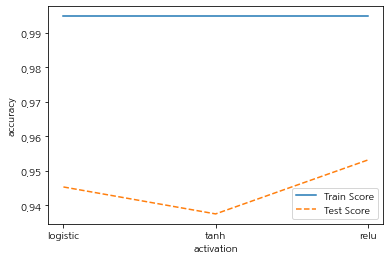

In [24]:
plt.plot(para_function, train_accuracy, linestyle="-", label = "Train Score")
plt.plot(para_function, test_accuracy, linestyle="--", label = "Test Score")
plt.xlabel("activation")
plt.ylabel("accuracy")
plt.legend()

In [25]:
df_accuracy_function.round(3)

,Activation,TrainScore,TestScore
0,logistic,0.995,0.945
1,tanh,0.995,0.938
2,relu,0.995,0.953


- relu함수의 성능이 가장 좋다.

### Solver: 가중치 최적화 변경

In [26]:
train_accuracy=[]; test_accuracy = []

para_solver = ["lbfgs", "sgd", "adam"] 
for v_solver in para_solver:
    nn = MLPClassifier(random_state=1234, hidden_layer_sizes =(60, 60),
                       activation = "relu", solver=v_solver)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainScore"] = train_accuracy
df_accuracy_solver["TestScore"] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


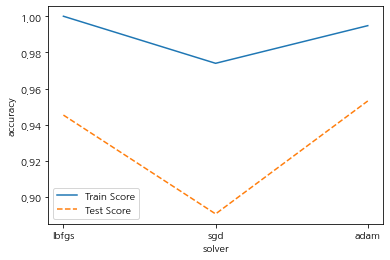

In [27]:
plt.plot(para_solver, train_accuracy, linestyle="-", label = "Train Score")
plt.plot(para_solver, test_accuracy, linestyle="--", label = "Test Score")
plt.xlabel("solver")
plt.ylabel("accuracy")
plt.legend()

In [28]:
df_accuracy_solver.round(3)

,Solver,TrainScore,TestScore
0,lbfgs,1.000,0.945
1,sgd,0.974,0.891
2,adam,0.995,0.953


- solver는 adam으로 선정

### MiniBatch 변경

In [35]:
train_accuracy=[]; test_accuracy = []

para_batch = [50*batch for batch in range(1, 10)] 
for v_minibatch in para_batch:
    nn = MLPClassifier(random_state=1234, hidden_layer_sizes =(60, 60),
                       activation = "relu", solver="adam",
                       batch_size = v_minibatch)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Batch"] = para_batch
df_accuracy_batch["TrainScore"] = train_accuracy
df_accuracy_batch["TestScore"] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


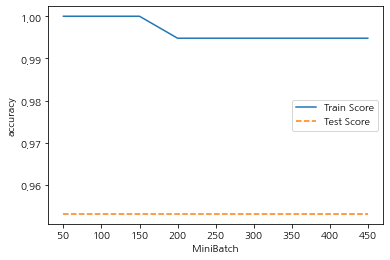

In [36]:
plt.plot(para_batch, train_accuracy, linestyle="-", label = "Train Score")
plt.plot(para_batch, test_accuracy, linestyle="--", label = "Test Score")
plt.xlabel("MiniBatch")
plt.ylabel("accuracy")
plt.legend()

In [37]:
df_accuracy_batch.round(3)

,Batch,TrainScore,TestScore
0,50,1.000,0.953
1,100,1.000,0.953
2,150,1.000,0.953
3,200,0.995,0.953
4,250,0.995,0.953
5,300,0.995,0.953
6,350,0.995,0.953
7,400,0.995,0.953
8,450,0.995,0.953


- batchsize는 train 데이터에는 과적합 경향, test데이터는 미니배치 크기가 증가할수록 오차 증가 경향성 있음
- 배치사이즈가 200쯤 되면 과대적합이 어느정도 해결되는 것 같으므로 200 선정

## 결론 도출

In [46]:
### 최종 모델 선정

In [41]:
nn_final = MLPClassifier(random_state=1234, hidden_layer_sizes =(60, 60), 
                          activation = "relu", solver="adam", batch_size = 200)
nn_final.fit(df_scaled_train_x, df_train_y)

y_pred = nn_final.predict(df_scaled_test_x)

# Train 데이터 설명력
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
#test데이터 설명력
print("Accuracy on test set: {:.3f}".format(nn_final.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Accuracy on training set: 0.995
Accuracy on test set: 0.953
Comfusion Matrix: 
[[31  0]
 [ 6 91]]


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


스케일링만 실시한 모델  
Accuracy on training set: 0.995
Accuracy on test set: 0.953  

초기모델과 하이퍼 파라미터 튜닝한 모델을 비교했을 때 큰 차이가 없는 것으로 보인다. 따라서 NN 모델의 경우 디폴트 값이 잘 형성되어 있기에, 데이터만 스케일링해서 사용하면 될 것으로 보인다.

- Confusion matrix의 경우 양성인 데이터는 잘 맞히지만, 음성인 경우에 양성으로 맞추는 경우가 좀 있는 것처럼 보인다. 해당 데이터의 경우 정확도 데이터뿐만 아니라 별도의 F1 score도 확인해봐야할 거 같다.

### 추가로 그리드 서치 가능